In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import TextVectorization
import spacy as sp
import re

from wordcloud import WordCloud
from matplotlib.colors import  ListedColormap

In [4]:
df = pd.read_csv('iphone.csv')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [5]:
df.drop_duplicates(inplace=True)
df.dropna(axis=0, inplace=True)

## Country wise Rating of Iphone

In [6]:
avg_rat_by_coun = df.groupby('country')['ratingScore'].mean()
avg_rat_by_coun

country
India                   3.795899
Japan                   3.310127
United Arab Emirates    3.912500
United States           3.633681
Name: ratingScore, dtype: float64

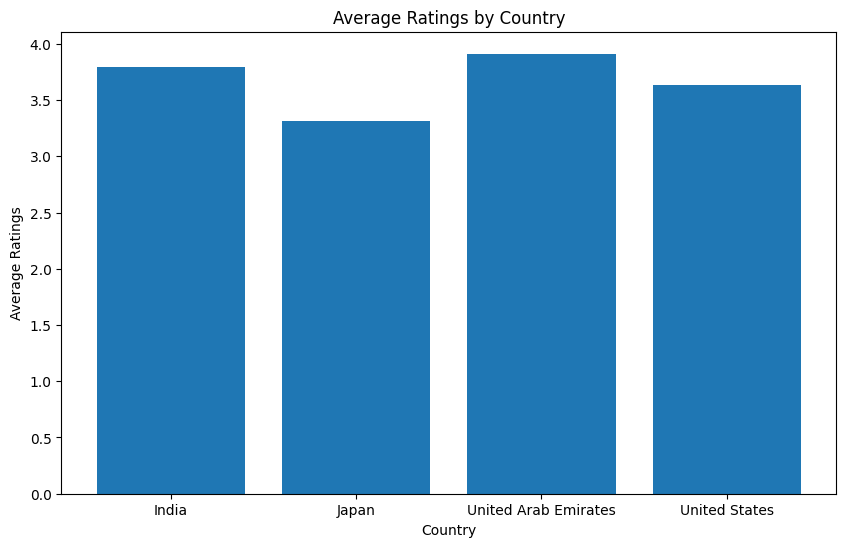

In [7]:
plt.figure(figsize=(10,6))
plt.bar(avg_rat_by_coun.index, avg_rat_by_coun.values)
plt.title('Average Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Average Ratings')
plt.xticks(rotation=0)

# Mostrar o gráfico
plt.show()

In [8]:
def word_map(product, data=df):
    reviews_product = data["reviewTitle"][data['reviewTitle'].str.contains(product)]

    color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])
    cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)
    cloud = cloud.generate(reviews_product.str.cat(sep='\n'))
    
    plt.figure(figsize=(12,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

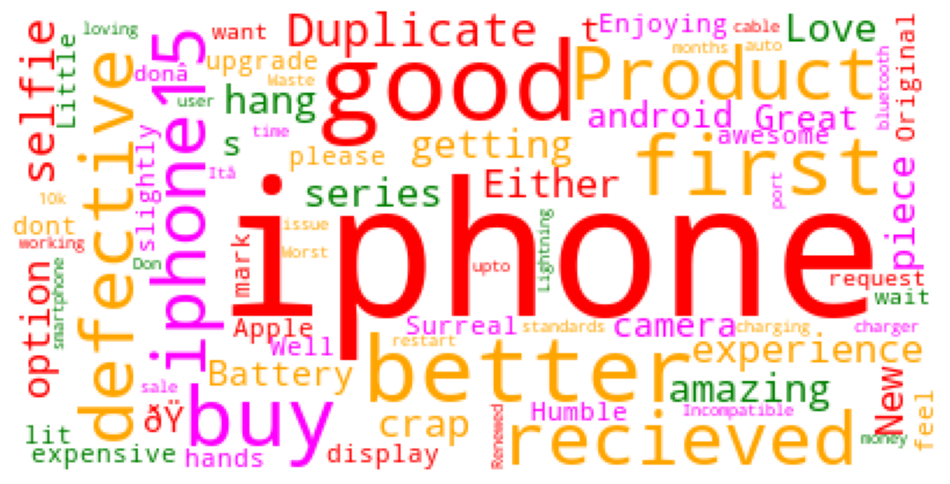

In [9]:
product = "iphone"
word_map(product)

In [10]:
nlp = sp.load("en_core_web_sm")

In [11]:
def clean_review(review): #The function is designed to clean and preprocess a review text.
    review = str(review)
    review = re.sub(r"\s+",  " ", review).strip() # It removes whitespaces with a single space.strip() removes any leading or trailing whitespaces.
    review = review.lower()
    review = re.sub(r'[^\w\s]', '', review) #This effectively removes punctuation marks from the string.
    review = re.sub(r'\d+', '', review) #This line removes any sequences of digits (\d+) from the string
    review = re.sub(r'https?://\S+|www\.\S+', '', review) #This line removes any URLs from the string, including both http and https protocols, as well as URLs starting with www.
    review = re.sub(r'<.*?>', '', review) #This line removes any HTML tags from the string
    review = re.sub(r'['u'\U0001F600-\U0001F64F' #This line removes any Unicode characters that fall within the specified ranges,
                    u'\U0001F300-\U0001F5FF'      #which correspond to various types of emojis and special characters.
                    u'\U0001F680-\U0001F6FF'
                    u'\U0001F1E0-\U0001F1FF'
                    u'\U00002702-\U00002780'
                    u'\U000024C2-\U0001F251'
                    ']+', u'', review) #
    doc =nlp(review) # it process the clean review and create a document object
    words = [token.text for token in doc if not token.is_stop and not token.is_punct] #This line extracts individual words from the document object
    description = " ".join(words) #This line joins the filtered words into a single string, separated by spaces
    return review

In [12]:
text = df['reviewDescription'][1]
print(text)
print("*_"*80)
print(clean_review(text))

It look so fabulous, I am android user switched to apple, performance wise iPhone is more better than android due to A15 Bionic chip. I feel pleasant while using iPhone in hand. I like it very much 😍❤️
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
it look so fabulous i am android user switched to apple performance wise iphone is more better than android due to a bionic chip i feel pleasant while using iphone in hand i like it very much 


In [13]:
descriptions =df['reviewDescription'].apply(clean_review)
ratings = df['ratingScore'].to_numpy()
ratings = ratings.reshape(-1, 1) # this line converts the ratings array from a 1D array to a 2D array with a single column.

In [14]:
max_len = max(len(description.split()) for description in descriptions)
print(f'Maximum length of a description: {max_len}')

vectorizer = TextVectorization(output_mode='int', split='whitespace', #specifies that the output should be integer indices.
                               standardize='strip_punctuation', max_tokens=10000, #specifies that punctuation should be removed from the text.
                               output_sequence_length=max_len)

vectorizer.adapt(descriptions) #This involves learning the vocabulary and creating a mapping from words to indices.
print(f'Vocabulary size: {vectorizer.vocabulary_size()}')

Maximum length of a description: 698
Vocabulary size: 6791


In [15]:
i = np.random.randint(0, len(descriptions))
print(descriptions[i])
print(vectorizer(descriptions)[i])

i appreciate them for using bubble wrap but still a corner of the iphone box was chipped probability during shipping but still amazon managed to deliver it without any hassle
tf.Tensor(
[1541  481   16   11  507  142   58    8   42   28    3    2   20   61
    5   90    8  604  288    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0   

In [22]:
def generate_dataset(descriptions_vectorized, score, buffer_size, batch_size, p):
    assert len(descriptions_vectorized) == len(score), "Features and labels must have the same length."
    assert 0 <= p <= 1, "p must be between 0 and 1."
    # Calculates the split size between training and testing
    size = int(p * len(descriptions_vectorized)) 
    #This line calculates the split size between the training and testing datasets based on the proportion p.

    # Creates the dataset from features and scores
    dataset = tf.data.Dataset.from_tensor_slices((descriptions_vectorized, score))
    # The from_tensor_slices method creates a dataset from a tensor by slicing it into individual elements.

    dataset = dataset.shuffle(buffer_size=buffer_size)
    #This line shuffles the dataset using a buffer size of buffer_size. 
    # Shuffling is a common technique in machine learning to randomize the order of the data.
    
    # Split the dataset into training and testing
    dataset_train = dataset.take(size)
    dataset_test = dataset.skip(size)

    # Apply batch and prefetch after split
    dataset_train = dataset_train.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    dataset_test = dataset_test.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    # These two lines apply batching and prefetching to both the training and testing datasets. Batching groups the data into batches of size batch_size,
    # and prefetching loads the next batch in the background to improve performance.
    
    return dataset_train, dataset_test

### - This function takes five parameters:

- descriptions_vectorized: a vectorized representation of descriptions
- score: a score associated with each description
- buffer_size: the size of the buffer for shuffling the dataset
- batch_size: the size of each batch in the dataset
- p: a proportion value between 0 and 1 that determines the split between training and testing datasets.

-----

### These two assertions ensure that:

- The length of descriptions_vectorized and score are equal, which is necessary for creating a dataset with features and labels.
- The value of p is between 0 and 1, which is necessary for splitting the dataset into training and testing sets.


In [23]:
descriptions_vectorized=vectorizer(descriptions)
buffer_size=10000 #This is the size of the buffer used for shuffling the dataset. A larger buffer size can lead to more thorough shuffling, but it also requires more memory. In this case, the buffer size is set to 10,000.
batch_size=32 #This is the size of each batch in the dataset. A batch is a group of data points that are processed together by the machine learning algorithm. In this case, the batch size is set to 32.
p=0.8 #This is the proportion of the dataset that should be used for training.


train_df, test_df = generate_dataset(descriptions_vectorized=descriptions_vectorized,
                                      score=ratings,
                                      buffer_size=buffer_size,
                                      batch_size=batch_size,
                                      p=p)

In [24]:
def create_model(vocab_size, embedding_dim, rnn_units, lr=0.001):
    model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim),
                                 tf.keras.layers.LSTM(rnn_units, return_sequences=True),
                                 tf.keras.layers.Dense(1)])
    
    optim =tf.keras.optimizers.Adam(learning_rate=lr)
    loss = tf.keras.losses.Huber()

    model.compile(loss=loss,
                  optimizer=optim,
                  metrics=['mae', 'mse'])
    return model

### This function takes four parameters:

- vocab_size: The size of the vocabulary in the input data.
- embedding_dim: The dimensionality of the embedding layer.
- rnn_units: The number of units in the LSTM layer.
- lr: The learning rate for the optimizer, defaulting to 0.001 if not provided.

------

### This line creates a TensorFlow Keras sequential model with three layers:

- Embedding Layer: This layer converts the input data into a dense vector representation using an embedding matrix. The vocab_size parameter determines the number of unique words in the vocabulary, and the embedding_dim parameter determines the dimensionality of the embedding space.

- LSTM Layer: This layer is a Long Short-Term Memory (LSTM) recurrent neural network layer. It takes the output from the embedding layer and processes it sequentially. The rnn_units parameter determines the number of units in the LSTM layer, and the return_sequences=True argument means that the LSTM layer will return the output at each time step.

- Dense Layer: This layer is a dense neural network layer with a single output unit. It takes the output from the LSTM layer and produces a final output.

-----
 ### Optimizer: 
  -  The Adam optimizer is used with a learning rate of lr.

 ### Loss Function: 
 -   The Huber loss function is used, which is a robust loss function that is less sensitive to outliers.


In [25]:
vocab_size = vectorizer.vocabulary_size()
embedding_dim = 128
rnn_units = 128
model = create_model(vocab_size, embedding_dim, rnn_units)

In [26]:
def my_callbacks(patience=5, verbose=1): #The level of verbosity for the callbacks. Defaults to 1.
    #The number of epochs to wait before stopping the training process if the validation loss does not improve. Defaults to 5.
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      verbose=verbose)
    
    #You can add other callbacks if you want, like ModelCheckpoint,  ReduceLROnPlateau, etc.
    #For Examplt, to save the bast model during training:
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras',
                                                          save_best_only=True,
                                                          monitor='val_loss',
                                                          verbose=verbose)
    return [early_stopping,  model_checkpoint]



In [28]:
max_epochs = 12
history = model.fit(train_df,
                    epochs=max_epochs,
                    validation_data=test_df,
                    callbacks=[my_callbacks()])

Epoch 1/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - loss: 0.8708 - mae: 1.3063 - mse: 2.8380
Epoch 1: val_loss improved from inf to 0.82098, saving model to best_model.keras
74/74 ━━━━━━━━━━━━━━━━━━━━ 54s 722ms/step - loss: 0.8706 - mae: 1.3061 - mse: 2.8376 - val_loss: 0.8210 - val_mae: 1.2690 - val_mse: 2.6451
Epoch 2/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - loss: 0.8689 - mae: 1.3075 - mse: 2.8587
Epoch 2: val_loss improved from 0.82098 to 0.81879, saving model to best_model.keras
74/74 ━━━━━━━━━━━━━━━━━━━━ 53s 722ms/step - loss: 0.8688 - mae: 1.3073 - mse: 2.8586 - val_loss: 0.8188 - val_mae: 1.2519 - val_mse: 2.6886
Epoch 3/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - loss: 0.8143 - mae: 1.2474 - mse: 2.7095
Epoch 3: val_loss did not improve from 0.81879
74/74 ━━━━━━━━━━━━━━━━━━━━ 53s 717ms/step - loss: 0.8148 - mae: 1.2479 - mse: 2.7109 - val_loss: 0.8888 - val_mae: 1.3311 - val_mse: 2.8777
Epoch 4/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - loss: 0.8229 - mae: 1.2607 -

In [29]:
def plot_history(history , metric): #The training history of a Keras model.
    # The metric to plot, such as 'loss', 'accuracy', etc.

    plt.plot(history.history[metric]) # This attribute contains the values of the metric at each epoch.
    plt.plot(history.history['val_' + metric]) #This line plots the validation metric over time
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

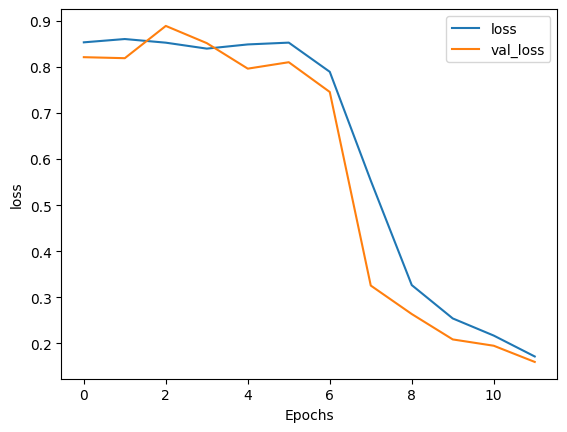

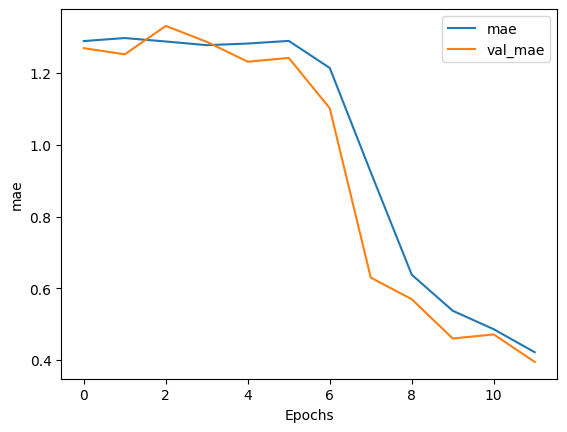

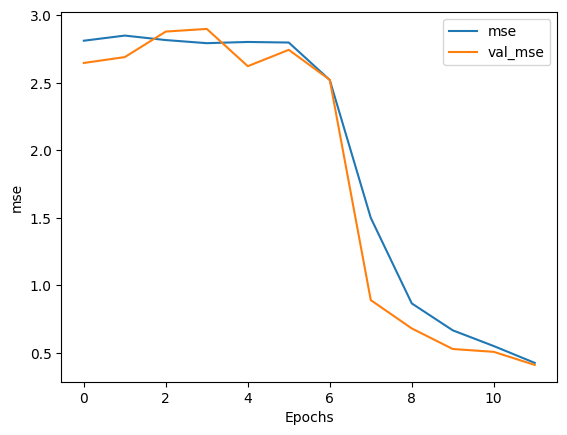

In [30]:
plot_history(history, 'loss')
plot_history(history, 'mae')
plot_history(history, 'mse')